In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is

In [3]:
from ml.preprocess import data
from utils import helper
from ml.models.base import brisk_xgboost, brisk_nn_pytorch

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


from dask_ml.preprocessing import StandardScaler
import xgboost as xgb

Prepare dataset

In [5]:

X, y = data.get_dataset(f_name = '20220319_covid_merge_processed.csv' , sep = ',')

X_tilda = X.drop(brisk_xgboost.DROP_LIST, axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X_tilda, y, test_size=0.25, random_state=123)

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.25, random_state=123)


In [6]:

brisk_xgboost.N_TRIALS = 1000

In [5]:
# xgb_model = brisk_xgboost.fetch_model()

In [17]:
# xgb_model.save_model('/mnt/c/Users/rwmas/GitHub/xai/xai_api/app/ml/models/saved/base/xgboost/xgboost.json')

In [93]:
model_xgb_2 = xgb.Booster()
model_xgb_2.load_model('/mnt/c/Users/rwmas/GitHub/xai/xai_api/app/ml/models/saved/base/xgboost/xgboost.json')


In [88]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [98]:
# x_pred = xgb_model.predict(dtest)
x_pred = model_xgb_2.predict(dtest)

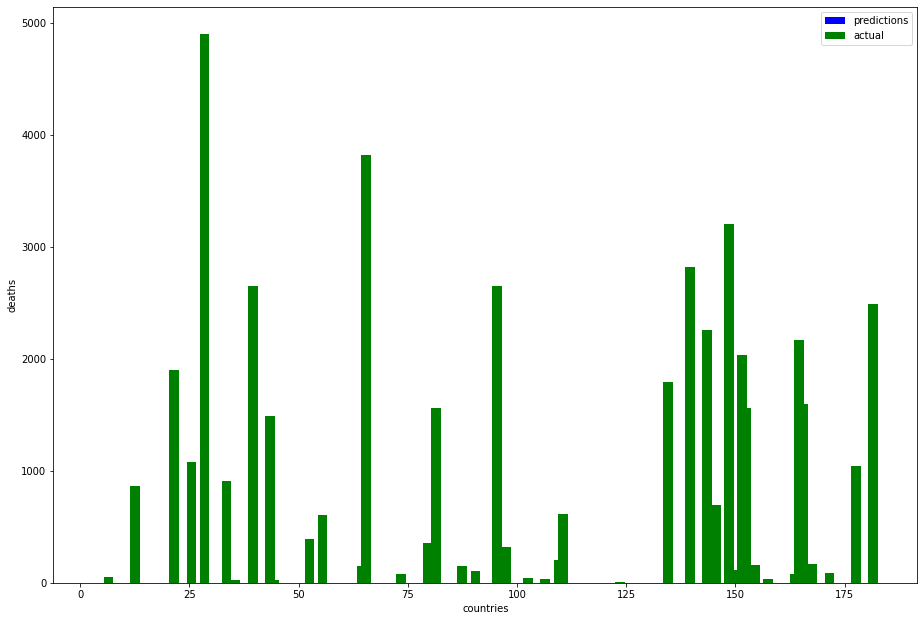

In [95]:
# plt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(X_test_orig['location'].values + 0.0, x_pred, color = 'b', width = 2.25)
# ax.bar(X['location'].values + 0.25, y_test.values.reshape(48, ), color = 'g', width = 0.25)
ax.bar(X_test_orig['location'].values + 2.50, y_test.values.reshape(48, ), color = 'g', width = 2.25)
# ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
plt.xlabel("countries")
plt.ylabel("deaths")
ax.legend(labels=['predictions', 'actual'])

In [99]:
df_xgbost = pd.DataFrame(list(zip(X_train_orig['location'].values, y_test.values.reshape(48, ), x_pred )),
               columns =['countary', 'deaths', 'predictions'])
df_xgbost

,countary,deaths,predictions
0,144,0.000,2.095772
1,154,4896.644,1.081382
2,157,1486.844,0.145046
3,8,55.799,0.185882
4,173,153.473,0.821746
5,80,2252.476,0.050443
6,52,146.353,0.094296
7,24,0.000,1.017841
8,82,604.743,0.183401
9,182,45.966,0.140653


In [97]:
err = np.round_(mean_squared_error( y_test.values.reshape(48, ), x_pred), decimals=2, out=None)
print(err)

2353968.02


### Fitting DNN

In [6]:
nn_model = brisk_neural_net.fetch_model(save = False)

NameError: name 'brisk_neural_net' is not defined

In [8]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_hidden_0 (Dense)      (None, 112)               4592      
                                                                 
 dense_hidden_1 (Dense)      (None, 36)                4068      
                                                                 
 dense_hidden_2 (Dense)      (None, 192)               7104      
                                                                 
 dense (Dense)               (None, 1)                 193       
                                                                 
Total params: 15,957
Trainable params: 15,957
Non-trainable params: 0
_________________________________________________________________


In [9]:
from dask_ml.preprocessing import StandardScaler

X_test = StandardScaler().fit_transform(X_test)

x_test_pred_nn = nn_model.predict(X_test.values)


2/2 [==============================] - 0s 3ms/step


In [10]:
x_test_pred_nn.reshape(48, )

array([  18.437984, 4678.266   , 1776.8557  ,  284.2955  ,  236.44307 ,
       1920.2205  ,  134.78377 ,  119.12004 ,  584.3589  ,   31.79977 ,
       1890.5734  ,   32.60845 , 4234.7925  ,   18.437984, 5016.5103  ,
       1296.5225  ,  782.91754 ,  517.6735  ,  112.085434,   57.928375,
        920.7203  , 2455.1375  , 1627.3164  , 1112.3176  ,   91.969826,
        156.94891 , 2393.493   , 2408.6736  , 2608.3909  , 1321.8667  ,
         18.437984, 1372.0596  ,   73.03522 ,   18.437984,   18.437984,
         18.437984, 1292.4856  ,  528.84515 ,  164.6401  ,  332.75928 ,
       2302.4204  ,  919.19666 , 2024.5425  ,  507.49313 ,  931.14197 ,
        123.93515 , 1131.1675  ,   18.437984], dtype=float32)

In [11]:
df = pd.DataFrame(list(zip(X_train_orig['location'].values, y_test.values.reshape(48, ), x_test_pred_nn.reshape(48, ) )),
               columns =['countary', 'deaths', 'predictions'])
df

,countary,deaths,predictions
0,144,0.000,18.437984
1,154,4896.644,4678.266113
2,157,1486.844,1776.855713
3,8,55.799,284.295502
4,173,153.473,236.443069
5,80,2252.476,1920.220459
6,52,146.353,134.783768
7,24,0.000,119.120041
8,82,604.743,584.358887
9,182,45.966,31.799770


In [69]:
err = np.round_(mean_squared_error(y_test.values.reshape(48, ), x_test_pred_nn.reshape(48, )), decimals=2, out=None)
print(err)

NameError: name 'x_test_pred_nn' is not defined

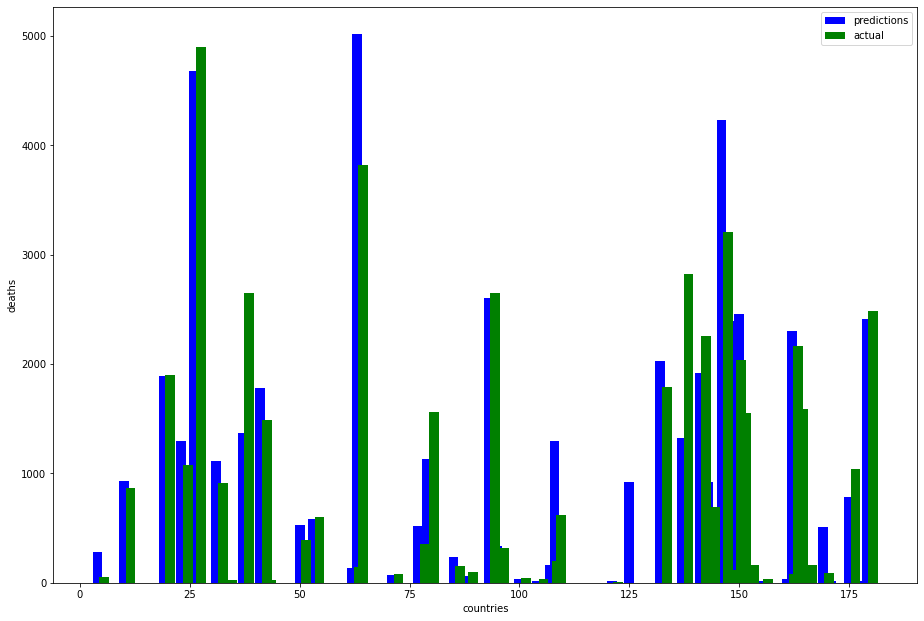

In [13]:
# plt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(X_test_orig['location'].values + 0.0, x_test_pred_nn.reshape(48, ), color = 'b', width = 2.25)
# ax.bar(X['location'].values + 0.25, y_test.values.reshape(48, ), color = 'g', width = 0.25)
ax.bar(X_test_orig['location'].values + 1.50, y_test.values.reshape(48, ), color = 'g', width = 2.25)
# ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
plt.xlabel("countries")
plt.ylabel("deaths")
ax.legend(labels=['predictions', 'actual'])

In [24]:
nn_model.save(brisk_neural_net.MODEL_SAVE_PATH)

In [21]:
from ml.models.base.brisk_model_lightning import BriskModel, BriskDataModule
from sklearn.model_selection import train_test_split
import pytorch_lightning as pl


In [19]:
clf = BriskModel(input_dim = 40)


In [27]:
X_scalar = StandardScaler().fit_transform(X_train)

X_scalar

,new_cases_per_million,population_cov,life_expectancy_cov,Population,Area_km2,Density_km2,Year_x,Meningitis,Neoplasms,"Fire, heat, and hot substances",...,Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,Acute hepatitis,Alzheimer's disease and other dementias,Parkinson's disease,Total,air_polution
144,0.172839,-0.288162,0.424252,-0.283278,-0.402022,0.022242,0.0,-0.378342,0.239083,-0.051878,...,-0.009505,1.461036,-0.016436,-0.124667,-0.209598,-0.648551,0.031821,0.359850,0.029802,-0.350254
154,2.680804,-0.273467,1.131720,-0.268350,-0.388998,-0.122698,0.0,-0.500812,1.625335,-0.931643,...,0.836701,-0.764317,-0.095089,0.709730,1.265352,-0.601520,2.204965,1.203002,0.975763,-0.562901
157,-0.361945,0.176154,-1.243547,0.170309,0.403482,-0.156620,0.0,0.036050,-0.488338,1.614256,...,-0.674371,-0.023453,-0.090726,-0.852900,-0.792569,-0.438879,-0.546020,-0.745467,0.574663,0.071859
8,0.079051,-0.089553,1.424655,-0.088679,4.674204,-0.183757,0.0,-0.516522,0.727436,-1.003608,...,-0.256128,-0.062250,0.570014,-0.959549,-0.558363,-0.609302,1.206787,1.136186,-0.354042,-1.144025
173,-0.153288,-0.278706,0.052556,-0.273767,-0.398991,-0.018464,0.0,-0.424882,0.017654,-0.160592,...,0.275179,1.917533,-0.620671,-0.541465,-0.105360,-0.578240,0.113031,0.017924,0.323504,-0.280503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.319917,-0.286451,0.205932,-0.281694,-0.387220,-0.175123,0.0,-0.465568,-0.657083,-0.527254,...,-0.816906,0.637475,-0.629125,-0.230739,-0.541662,-0.648551,-0.488580,-0.520958,-0.963068,-0.371758
98,1.703201,-0.268727,0.386945,-0.262655,-0.359281,-0.159087,0.0,-0.458155,1.384016,0.335022,...,3.343020,-1.033997,-0.232585,0.912452,2.134712,-0.613666,1.721561,1.187378,2.544196,-0.934373
66,0.936048,-0.209146,1.258843,-0.201865,-0.315287,-0.136266,0.0,-0.501363,1.926332,-0.541234,...,1.853185,1.857805,1.308740,-0.590645,0.244693,-0.286353,2.316310,2.468497,1.910941,-0.717339
126,0.332530,-0.273437,0.368981,-0.268310,-0.385407,-0.135650,0.0,-0.508171,1.180707,-0.857241,...,2.775715,-0.355284,-0.069473,-0.388691,-0.436643,-0.601636,-0.049348,0.879493,1.689676,0.316590


In [28]:
data_train = BriskDataModule(X_scalar, y_train, batch_size=64)
data_test = BriskDataModule(X_scalar, y_train, batch_size=64)
# data.setup()

In [29]:
trainer = pl.Trainer(min_epochs=10, max_epochs=50, enable_progress_bar=False)
trainer.fit(clf, data)

validation ended: MSE 1897442.0
validation ended: MSE 1897204.75
validation ended: MSE 1896811.5
validation ended: MSE 1896110.625
validation ended: MSE 1894888.5
validation ended: MSE 1892832.875
validation ended: MSE 1889514.0
validation ended: MSE 1884341.0
validation ended: MSE 1876602.0
validation ended: MSE 1865529.0
validation ended: MSE 1850493.375
validation ended: MSE 1831431.25
validation ended: MSE 1809683.75
validation ended: MSE 1789465.375
validation ended: MSE 1780288.125
validation ended: MSE 1798914.25
validation ended: MSE 1863102.5
validation ended: MSE 1962382.0
validation ended: MSE 2056829.125
validation ended: MSE 2122387.75
validation ended: MSE 2159193.25
validation ended: MSE 2177383.5
validation ended: MSE 2187097.0
validation ended: MSE 2195863.0
validation ended: MSE 2209091.75
validation ended: MSE 2230343.75
validation ended: MSE 2260299.5
validation ended: MSE 2295173.25
validation ended: MSE 2327903.0
validation ended: MSE 2352341.25
validation ended: 

In [31]:
trainer.validate(clf, data)

validation ended: MSE 2197625.0


[{}]

In [ ]:
trainer.test(clf, data)

In [ ]:
params = {
        'N_LAYERS' : 8,
        'MAX_N_NEURONS' : 256,
        'EPOCHS' : 300,
        'N_TRIALS' : 1000,
        'RANDOM_STATE' : 432,
        'TEMP_PATH' : "/mnt/c/Users/rwmas/GitHub/xai/xai_api/app/ml/models/saved/temp/",
        'MODEL_SAVE_PATH' : "/mnt/c/Users/rwmas/GitHub/xai/xai_api/app/ml/models/saved/base/brisk_nn_pytorch/",
        'DROP_LIST' : ['location'],
        'STD_DEMON' : 3,
        'NUM_RERUNS' : 5
}

In [6]:
import pprint
pprint(params)

NameError: name 'params' is not defined

Fit DNN Pytorch

In [7]:
best_pytorch = brisk_nn_pytorch.fetch_model()

2022-10-06 12:51:22,667 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-ixggw260', purging
2022-10-06 12:51:22,667 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-lm9wx654', purging
2022-10-06 12:51:22,667 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-cb4ajys9', purging
2022-10-06 12:51:22,667 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-gi8jgnan', purging


Dask dashboard is available at http://127.0.0.1:8787/status
########## Re-running the discovery process ###############
Starting train for trials:1000 with epochs:300


[I 2022-10-06 12:51:51,104] Trial 12 finished with value: 915550.875 and parameters: {'learning_rate': 0.0018142359109476907, 'optimizer': 'Adam', 'batch_size': 2048, 'n_layers': 1, 'n_units_l0': 212}. Best is trial 12 with value: 915550.875.
[I 2022-10-06 12:51:58,247] Trial 13 finished with value: 7423961.0 and parameters: {'learning_rate': 0.020007936023113376, 'optimizer': 'Adam', 'batch_size': 1024, 'n_layers': 4, 'n_units_l0': 203, 'n_units_l1': 137, 'n_units_l2': 206, 'n_units_l3': 30}. Best is trial 12 with value: 915550.875.
[I 2022-10-06 12:51:59,245] Trial 8 finished with value: 1555972.125 and parameters: {'learning_rate': 0.06928979170553885, 'optimizer': 'Adam', 'batch_size': 2048, 'n_layers': 4, 'n_units_l0': 44, 'n_units_l1': 52, 'n_units_l2': 17, 'n_units_l3': 53}. Best is trial 12 with value: 915550.875.


KeyboardInterrupt: 

In [13]:
X_test

,new_cases_per_million,population_cov,life_expectancy_cov,Population,Area_km2,Density_km2,Year_x,Meningitis,Neoplasms,"Fire, heat, and hot substances",...,Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,Acute hepatitis,Alzheimer's disease and other dementias,Parkinson's disease,Total,air_polution
171,0.000,1.368000e+03,81.86,1.319000e+03,5.0,110.0,2019.0,0.000000,0.151630,0.000000,...,0.303260,0.075815,0.075815,0.000000,0.000000,0.000000,0.000000,0.000000,0.682335,6.84874
26,144336.090,6.896655e+06,75.05,7.051608e+06,42818.0,64.0,2019.0,0.000553,0.312113,0.001659,...,1.121999,0.027653,0.043054,0.038388,0.063915,0.000128,0.044614,0.014181,1.770022,19.92702
41,140487.169,5.139053e+06,80.28,4.999441e+06,19730.0,98.0,2019.0,0.000700,0.120994,0.000420,...,0.133295,0.027443,0.028503,0.019202,0.035524,0.000060,0.025903,0.004380,0.474053,17.43615
4,2898.709,3.393361e+07,61.15,3.080979e+07,481351.0,25.0,2019.0,0.008179,0.041516,0.001665,...,0.083493,0.007997,0.012769,0.018390,0.029117,0.000798,0.003710,0.000867,0.562613,28.02152
85,26254.785,1.260508e+08,84.63,1.272022e+08,145919.0,337.0,2019.0,0.000320,0.347851,0.001271,...,0.292828,0.035631,0.043862,0.020635,0.047799,0.000082,0.129616,0.013168,1.076846,13.64744
141,86437.428,1.459120e+08,72.58,1.457340e+08,6601633.0,9.0,2019.0,0.000784,0.203674,0.004528,...,0.689565,0.007995,0.027029,0.031634,0.062365,0.000039,0.033237,0.006443,1.219497,11.77739
62,4776.945,2.486937e+06,62.05,2.280094e+06,4361.0,202.0,2019.0,0.009298,0.046928,0.001974,...,0.114162,0.013596,0.018596,0.015657,0.027411,0.000921,0.006754,0.002149,0.551293,58.21450
145,164.879,2.001440e+05,73.32,1.961290e+05,1097.0,69.0,2019.0,0.001020,0.079030,0.001020,...,0.274819,0.031102,0.053536,0.015296,0.028043,0.000510,0.014276,0.005099,0.676086,10.83320
53,20727.009,6.518500e+06,73.32,6.420746e+06,8124.0,305.0,2019.0,0.000810,0.091968,0.000654,...,0.150995,0.063591,0.023580,0.023362,0.037877,0.000093,0.026399,0.004750,0.622155,22.34945
100,2161.074,2.842733e+07,67.04,2.626231e+07,226755.0,45.0,2019.0,0.007935,0.041927,0.001542,...,0.134782,0.007379,0.022961,0.017226,0.027374,0.000948,0.003271,0.000792,0.597670,17.85980


In [56]:
X_test = StandardScaler().fit_transform(X_test)     
X_test_tensor = helper.df_to_tensor(X_test)

In [57]:
X_test_tensor.shape

torch.Size([48, 40])

In [64]:
pred_dnn = best_pytorch(X_test_tensor)

In [65]:
mean_squared_error(helper.torch_tensor_to_numpy(pred_dnn), y_test)

131241.51819139413

In [18]:
def get_rerun_status(pred, y_test):

    pred = helper.torch_tensor_to_numpy(pred)
    y_test = y_test.values
    
    std_demon = 3
    ul = y_test.mean() + y_test.std()/std_demon
    ll = y_test.mean() - y_test.std()/std_demon



    mean_pred = pred.mean()

    print(mean_pred)
    print(ul)


    if (mean_pred < ul) & (mean_pred > ll):
        return False

    else: 
        return True



In [62]:
get_rerun_status(pred_dnn, y_test)

NameError: name 'get_rerun_status' is not defined

In [66]:
df_dnn = pd.DataFrame(list(zip(X_train_orig['location'].values, y_test.values.reshape(y_test.shape[0], ), 
                                    helper.torch_tensor_to_numpy(pred_dnn).reshape(pred_dnn.shape[0]) )),
               columns =['countary', 'deaths', 'predictions'])
df_dnn


,countary,deaths,predictions
0,144,0.000,72.942856
1,154,4896.644,4684.351562
2,157,1486.844,1270.367188
3,8,55.799,125.158325
4,173,153.473,866.250610
5,80,2252.476,1972.265503
6,52,146.353,40.099644
7,24,0.000,35.251743
8,82,604.743,795.203308
9,182,45.966,130.282318


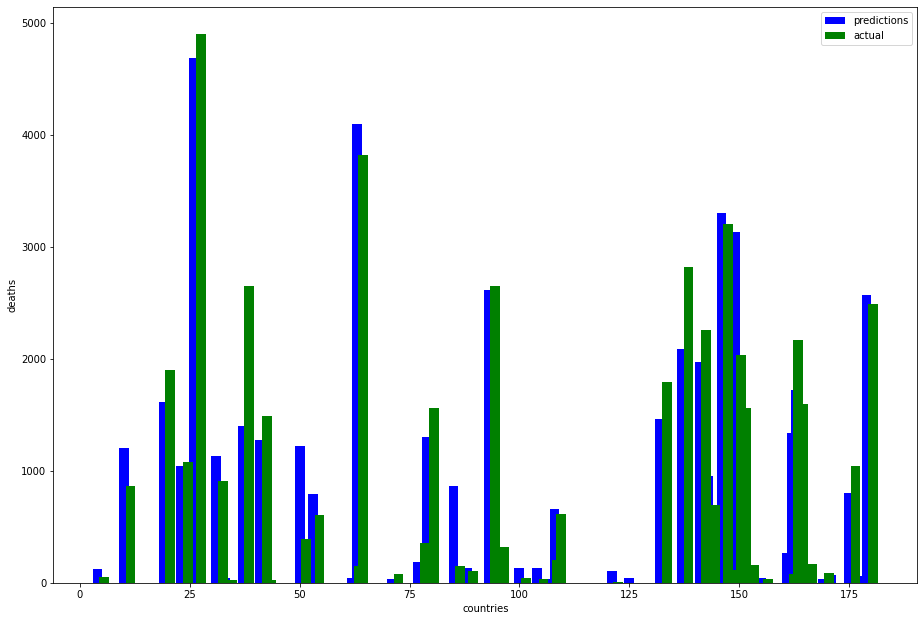

In [68]:
# plt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(X_test_orig['location'].values + 0.0, df_dnn.predictions.values, color = 'b', width = 2.25)
# ax.bar(X['location'].values + 0.25, y_test.values.reshape(48, ), color = 'g', width = 0.25)
ax.bar(X_test_orig['location'].values + 1.50, y_test.values.reshape(48, ), color = 'g', width = 2.25)
# ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
plt.xlabel("countries")
plt.ylabel("deaths")
ax.legend(labels=['predictions', 'actual'])